## Sarwar Khan
## Student ID: 106761503

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as  plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('train.csv')

train_data = data[['school', 'sex', 'age', 'famsize', 'studytime', 'failures',
                         'activities', 'higher', 'internet', 'romantic', 'famrel',
                         'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences','G3']]

train_data.dropna()
train_data.head()
data_no_g3 = pd.read_csv('test_no_G3.csv')
test_data=data_no_g3[['school', 'sex', 'age', 'famsize', 'studytime', 'failures',
                         'activities', 'higher', 'internet', 'romantic', 'famrel',
                         'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']]

test_data.dropna()
test_data.head()

,school,sex,age,famsize,studytime,failures,activities,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,M,15,GT3,2,0,yes,yes,yes,no,4,3,3,1,1,5,0
1,GP,F,16,GT3,1,0,no,yes,yes,yes,4,5,2,1,1,5,4
2,GP,M,18,GT3,2,0,no,yes,yes,no,3,3,3,5,5,4,0
3,GP,F,15,GT3,1,0,yes,yes,no,no,4,3,1,1,1,2,8
4,GP,F,17,GT3,3,0,no,yes,yes,yes,4,4,3,1,1,5,0


In [2]:
def OneHotEncoding(train_data):
    for i in list(train_data):
        if str(train_data[i].dtypes) == 'object':
            hot_encode = pd.get_dummies(train_data[i], prefix = i ,drop_first=True) #False for not binary data
            train_data = train_data.drop(i,axis = 1)
            train_data = train_data.join(hot_encode)
    return train_data

train_data_hot=OneHotEncoding(train_data)
test_data_hot = OneHotEncoding(test_data)

test_data_hot.shape

(44, 17)

In [3]:
def split_train_test(data,split_ratio=0.8):
    print("Splitting data into %.0f %% training and %.0f %% testing"%(100*split_ratio, 100*(1-split_ratio)))
    train = train_data_hot.sample(frac=split_ratio, random_state=100)
    test = train_data_hot.drop(train.index)
    
    train_y=train['G3']  
    train_x=train.drop ('G3',axis = 1)
    test_Y=test['G3']  
    test_X=test.drop ('G3',axis = 1)
    print("Splitting data is done!!!!!!!")
    return train_x,train_y,test_X, test_Y
train_x,train_y,test_X, test_Y = split_train_test(train_data_hot, 0.8)
print("Train_x  Train_y    Test_x Test_y")
print(train_x.shape,train_y.shape,test_X.shape, test_Y.shape)
    

Splitting data into 80 % training and 20 % testing
Splitting data is done!!!!!!!
Train_x  Train_y    Test_x Test_y
(800, 17) (800,) (200, 17) (200,)


In [4]:
train_x

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_MS,sex_M,famsize_LE3,activities_yes,higher_yes,internet_yes,romantic_yes
249,18,4,0,4,5,5,1,3,2,4,0,0,0,1,1,1,1
353,17,4,0,4,2,3,1,1,4,2,0,0,1,1,1,1,0
537,16,3,0,3,2,3,2,2,1,4,0,1,0,0,1,1,1
424,19,3,2,4,1,2,1,1,3,14,0,0,0,0,1,1,1
564,16,1,0,3,1,3,1,3,5,4,0,1,1,1,1,1,0
124,16,1,0,4,3,2,2,4,5,0,0,1,0,0,1,1,0
492,17,2,0,4,3,4,2,2,1,10,0,0,0,1,1,1,1
553,17,1,0,5,2,3,1,2,5,4,0,1,0,0,1,1,0
982,17,1,0,5,2,3,1,2,5,4,0,1,0,0,1,1,0
935,16,2,0,4,3,2,1,3,5,6,1,0,1,0,1,1,0


In [4]:
def Normalization(data):
    print('Normalization started!!!!')
    data = (data-data.mean())/data.std()
    #data = data.values
    #print('Normalization done!!!!')
    return data
train_x = Normalization(train_x)
train_x = train_x.values
test_X = Normalization(test_X)
test_X = test_X.values
train_y = train_y.values
test_Y = test_Y.values
final_test = Normalization(test_data_hot)
final_test = final_test.values


Normalization started!!!!
Normalization started!!!!
Normalization started!!!!


In [5]:
def LinearRegression(train_x, train_y, lamda=0):
    Xtranspose = np.matrix.transpose(train_x)
    identity = np.identity(len(train_x[0,:]))
    identity[0,0] = 0
    temp1 = np.add(np.dot(Xtranspose, train_x),(len(train_x))*lamda*identity) #IF lamda is 0, no regularization term
    coff = np.dot(np.linalg.inv(temp1),np.dot(Xtranspose,train_y))
    #coff = np.linalg.inv(Xtranspose.dot(train_x)).dot(Xtranspose).dot(train_y)
    return coff
W_lg=LinearRegression(train_x,train_y,0)
Yhat_linear = test_X.dot(W_lg)

In [6]:
from math import *

def MSE(Yhat,y):
    total = 0
    for i in range(0,len(Yhat)):
        err= (Yhat[i]- y[i])**2
        total += err
    total= total/len(Yhat)
    return total
error_Linear = sqrt(MSE(Yhat_linear,test_Y))
print("Linear Regression Test RMSE is %.4f"%(error_Linear))


Linear Regression Test RMSE is 12.2774


In [7]:
W_rg=LinearRegression(train_x,train_y,0.5)
Yhat_reg = test_X.dot(W_rg)
error_linear_reg = sqrt(MSE(Yhat_reg,test_Y))
print("Linear Regression with Reg Test RMSE is %.4f"%(error_linear_reg-W_rg.dot(W_rg)/2))

Linear Regression with Reg Test RMSE is 11.7471


In [8]:
def Bayesian(x,y,alpha=1,meo=0,lamb=0):

    x=np.insert(x, 0, 1, axis=1)
    
    ident=np.identity(np.array(x).shape[1])
    ident[0,0]=0
    reg=lamb*ident
    delta=np.float64((1/alpha)*np.identity(x.shape[1]))
    delta_m=np.float64(np.linalg.inv((np.transpose(x) @ x)+ np.linalg.inv(delta)))
    meo_m=np.float64((delta_m @ ((np.transpose(x) @ y) )+ np.linalg.inv(delta)*meo ))
    #weights = np.float64(np.linalg.inv(np.add((np.transpose (x) @ x), reg)) @ (np.transpose(x) @ y))
    #pdf=np.float64(np.exp((-1/2)*np.transpose(weights-meo_m) @ np.linalg.inv(delta_m) @ (weights-meo_m)))

    weights=meo_m.mean(0)

    
    return weights[1:], weights[:1]

W_b, b0= Bayesian(train_x, train_y)

yhat_ba = test_X.dot(W_b.T) +float(b0)
error_bays = sqrt(MSE(yhat_ba, test_Y))
print("Bayesian Regression RMSE: %.4f"%error_bays)

Bayesian Regression RMSE: 3.1225


In [9]:
def LinearRegB(train_x, train_y, lamda=0):
    train_x = np.hstack((np.matrix(np.ones(train_x.shape[0])).T, train_x)) 
    Xtranspose = np.matrix.transpose(train_x)
    identity = np.identity(len(train_x[0,:]))
    identity[0,0] = 0 # No need to penality the biased term
    temp1 = np.add(np.dot(Xtranspose, train_x),(len(train_x))*lamda*identity)
    coff = np.dot(np.linalg.inv(temp1),np.dot(Xtranspose,train_y).T)
    #coff = np.linalg.inv(Xtranspose.dot(train_x)).dot(Xtranspose).dot(train_y)
    return coff[1:], coff[:1] 
W_lb, b0=LinearRegB(train_x,train_y,.5)
Yhat_linear_b = test_X.dot(W_lb) + float(b0)
y_final_test = final_test.dot(W_lb) + float(b0)
error_test = sqrt(MSE(Yhat_linear_b,test_Y))
print("Linear Regression with B0 Test RMSE is %.4f"%(error_test))

Linear Regression with B0 Test RMSE is 3.1195


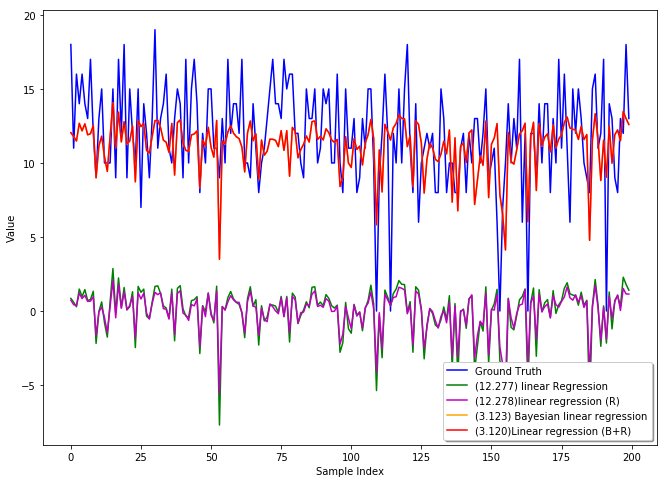

<Figure size 7200x720 with 0 Axes>

In [10]:
import matplotlib
plt.figure(figsize=(11,8))
plt.plot(test_Y,color='b')
plt.plot(Yhat_linear, color='g')
plt.plot(Yhat_reg, color='m')
plt.plot(yhat_ba, color= 'orange')
plt.plot(Yhat_linear_b, color = 'r')
plt.xlabel("Sample Index")
plt.ylabel("Value")

plt.legend(('Ground Truth','(%.3f) linear Regression'%(error_Linear),
            '(%0.3f)linear regression (R)'%(error_linear_reg),
            '(%0.3f) Bayesian linear regression'%(error_bays),
            '(%0.3f)Linear regression (B+R)'%(error_test)),
           loc='lower right', shadow=True)
plt.figure(figsize=(100,10))
plt.savefig('plot')
plt.show()

## Classification 

In [66]:
# Creating LABLE Using G3 values
for i in range(len(train_y)):
    if train_y[i] >= 10:
        train_y[i]=1
    else:
        train_y[i]=0
for i in range(len(test_Y)):
    if test_Y[i] >= 10:
        test_Y[i]=1
    else:
        test_Y[i]=0

In [67]:
def LinearClassification(x,y,thres,lamda=0):
    x = np.hstack((np.matrix(np.ones(x.shape[0])).T, x)) 
    Xtranspose = np.matrix.transpose(x)
    identity = np.identity(len(x[0,:]))
    identity[0,0] = 0 # No need to penality the biased term
    temp1 = np.add(np.dot(Xtranspose, x),(len(x))*lamda*identity)
    coff = np.dot(np.linalg.inv(temp1),np.dot(Xtranspose,y).T)
    #coff = np.linalg.inv(Xtranspose.dot(train_x)).dot(Xtranspose).dot(train_y)
    weights, b0 = coff[1:], coff[:1] 
     
    y_pred = np.dot(test_X,weights)+b0
    
    for i in range(len(y_pred)):
        if y_pred[i]>=thres:
            y_pred[i]=1
        else:
            y_pred[i]=0
    return y_pred

pred_y_9=LinearClassification(train_x,train_y,0.9, 1)
pred_y_5=LinearClassification(train_x,train_y,0.5, 1)
pred_y_1=LinearClassification(train_x,train_y,0.1, 1)

def evaluate(y,y_pred,thres):
    TP = 0 # True positve
    FP = 0 # false +ve
    TN = 0 # true negative
    FN = 0 # false -ve

    for i in range(len(y)):
        
        if y[i]==y_pred[i]==1:
            TP+=1
        if y_pred[i]==1 and y[i]!=y_pred[i]:
            FP += 1
        if y[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y[i]!=y_pred[i]:
            FN += 1
        accuracy = (TP+TN)/(TP+TN+FP+FN)*100 # Correct /total * 100
    print('Accuracy of system with thresould = %.1f is %.2f'%(thres,accuracy))
    return {'TP':TP,'FP':FP,'TN':TN,'FN':FN}
    

Accuracy of system with thresould = 0.5 is 83.50
Precision = 0.8478  Recall = 0.9689 F1-Score = 0.9043

{'TP': 156, 'FP': 28, 'TN': 11, 'FN': 5}


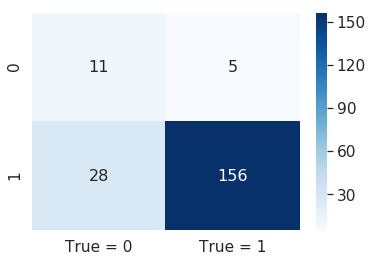

Accuracy of system with thresould = 0.9 is 32.00
Precision = 0.9032  Recall = 0.1739 F1-Score = 0.2917

{'TP': 28, 'FP': 3, 'TN': 36, 'FN': 133}


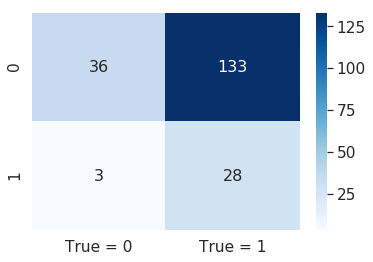

Accuracy of system with thresould = 0.1 is 81.00
Precision = 0.8122  Recall = 0.9938 F1-Score = 0.8939

{'TP': 160, 'FP': 37, 'TN': 2, 'FN': 1}


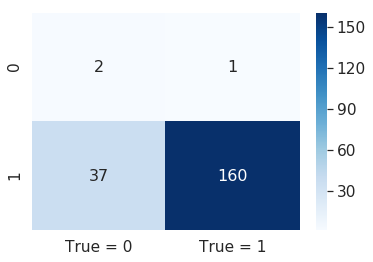

In [86]:
def performance(matrix):
    recall = matrix['TP']/(matrix['TP']+matrix['FN'])
    precision = matrix['TP']/(matrix['TP']+matrix['FP'])
    F1 = 2*recall*precision/(recall+precision)
    print('Precision = %.4f  Recall = %.4f F1-Score = %.4f\n'%(precision,recall,F1))


confusionMatrix5=evaluate(test_Y,pred_y_5,0.5)
performance(confusionMatrix5)
draw_performance(confusionMatrix5)
confusionMatrix9=evaluate(test_Y,pred_y_9,0.9)
performance(confusionMatrix9)
draw_performance(confusionMatrix9)
confusionMatrix1=evaluate(test_Y,pred_y_1,0.1)
performance(confusionMatrix1)
draw_performance(confusionMatrix1)

In [79]:
class LogisticRegression:
    
    def __init__(self, lr=0.01, num_iter=10000, intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.intercept = intercept
       
    
    def add_bias(self, X):
        inte = np.ones((X.shape[0], 1))
        return np.concatenate((inte, X), axis=1)
    
    
    
    def fit(self, X, y):
        if self.intercept:
            X = self.add_bias(X)
        
        # putting all ones in the initial weights
        self.W = np.ones(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.W)
            h = self.sigmoid(z)
            temp0 = h-y
            grad = np.dot(X.T, (temp0)) / y.size
            self.W -= self.lr * grad
    
    def sigmoid(self, h):
        return 1 / (1 + np.exp(-h))
    def predict(self, X, thres):
        return self.prob(X) >= thres
    
    def prob(self, X):
        if self.intercept:
            X = self.add_bias(X)
    
        return self.sigmoid(np.dot(X, self.W))
    
    

Accuracy of system with thresould = 0.5 is 84.00
Precision = 0.8603  Recall = 0.9565 F1-Score = 0.9059

{'TP': 154, 'FP': 25, 'TN': 14, 'FN': 7}
{'TP': 154, 'FP': 25, 'TN': 14, 'FN': 7}


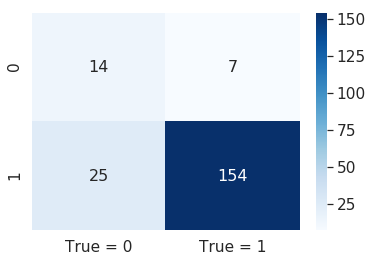

In [85]:
model = LogisticRegression(lr=0.01, num_iter=10000)
model.fit(train_x, train_y)

preds = model.predict(test_X,0.5)
Y_FINAL= model.predict(final_test,0.5)
# accuracy
confusionMatrix50=evaluate(test_Y,preds,0.5)
performance(confusionMatrix50)
print(confusionMatrix50)
draw_performance(confusionMatrix50)


In [72]:
tp, tn, fp, fn = confusionMatrix9['TP'], confusionMatrix9['TN'], confusionMatrix9['FP'], confusionMatrix9['FN']

In [87]:
def draw_performance(confusionMatrix):
    plt.figure()

    tp, tn, fp, fn = confusionMatrix['TP'], confusionMatrix['TN'], confusionMatrix['FP'], confusionMatrix['FN']
    d = {'True = 0': [tn, fp], 'True = 1': [fn, tp]}
    df = pd.DataFrame(data=d)
    #df = pd.DataFrame(data=confusionMatrix5)
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df, annot=True,annot_kws={"size": 16},cmap='Blues',fmt='g')# font size
    plt.show()
    

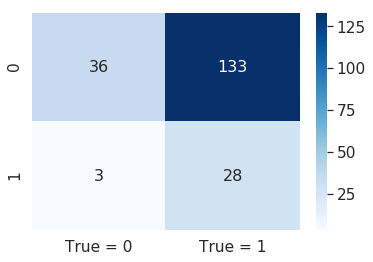

In [74]:
import seaborn as sns

d = {'True = 0': [tn, fp], 'True = 1': [fn, tp]}
df = pd.DataFrame(data=d)
#df = pd.DataFrame(data=confusionMatrix5)
sns.set(font_scale=1.4)#for label size
sns.heatmap(df, annot=True,annot_kws={"size": 16},cmap='Blues',fmt='g')# font size
plt.show()


In [299]:
#y_final_test
file = open("106761503_1.txt", 'w')
for i in range(len(y_final_test)):
    file.write("%d\t%.2f\n"%(i+1001,y_final_test[i]))
file.close()

In [320]:
#Y_FINAL
file = open("106761503_2.txt", 'w')
for i in range(len(Y_FINAL)):
    if Y_FINAL[i]:
        temp=1
    else:
        temp=0
    file.write("%d\t%d\n"%(i+1001,temp))
file.close()